In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
liver_df = pd.read_csv('./indian_liver_patient.csv')

In [3]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

('Number of patients diagnosed with liver Damage: ', 416)
('Number of patients not diagnosed with liver Damage: ', 167)


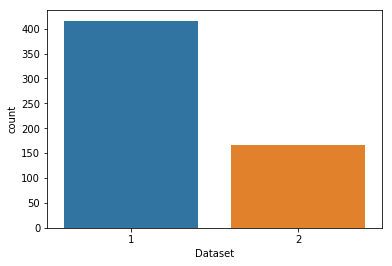

In [7]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver Damage: ',LD)
print('Number of patients not diagnosed with liver Damage: ',NLD)

('Number of patients that are male: ', 441)
('Number of patients that are female: ', 142)


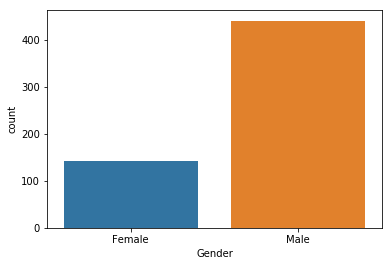

In [8]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M_count, F_count = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M_count)
print('Number of patients that are female: ',F_count)

/opt/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


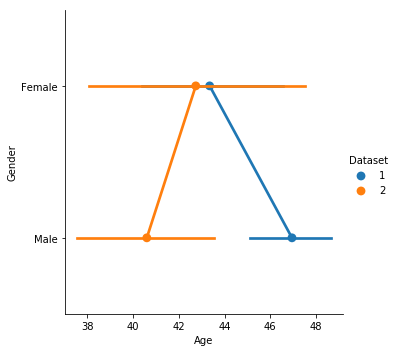

In [9]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=liver_df);

In [10]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [16]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


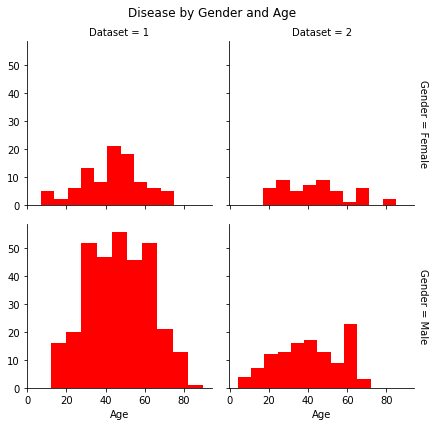

In [11]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

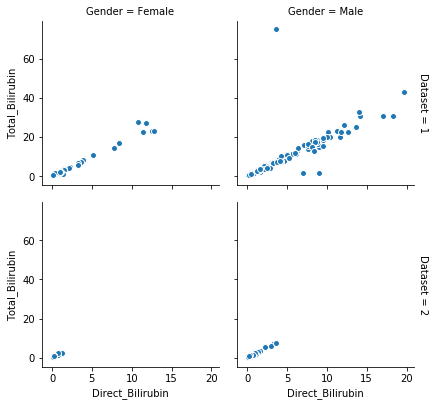

In [17]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

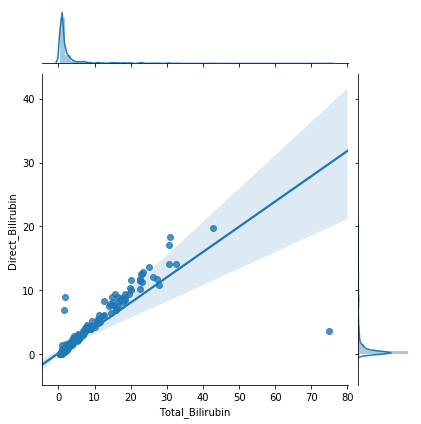

In [12]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

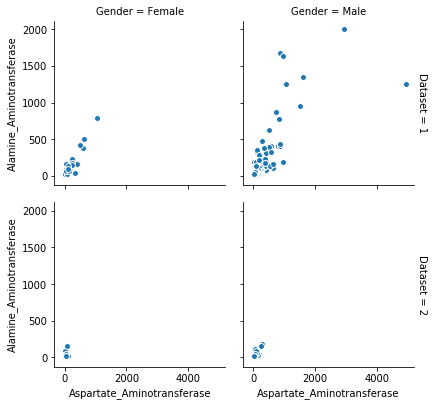

In [18]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

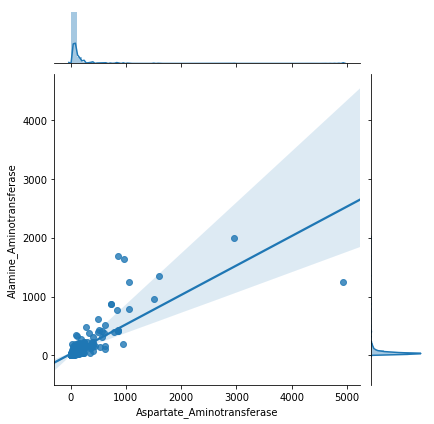

In [13]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

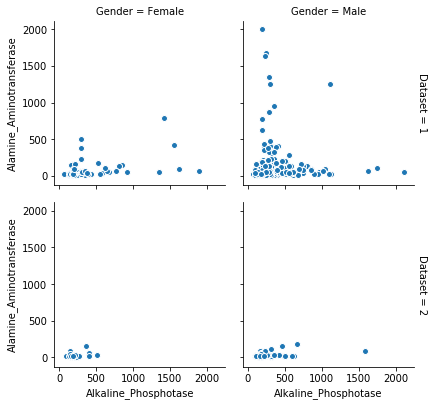

In [19]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

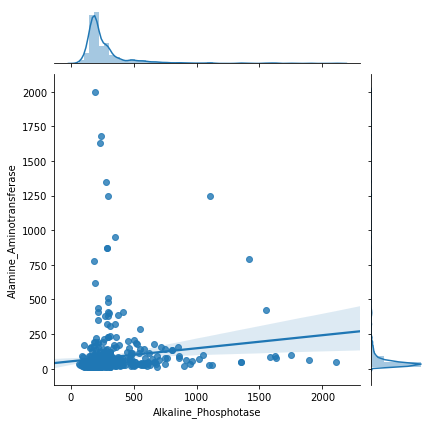

In [14]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

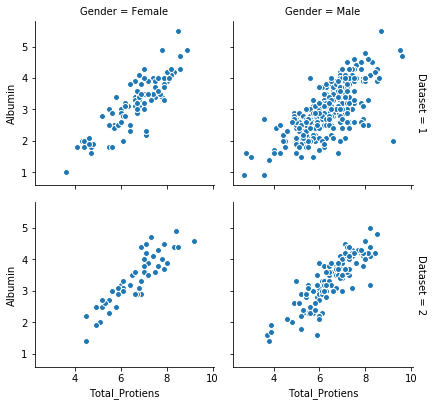

In [15]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

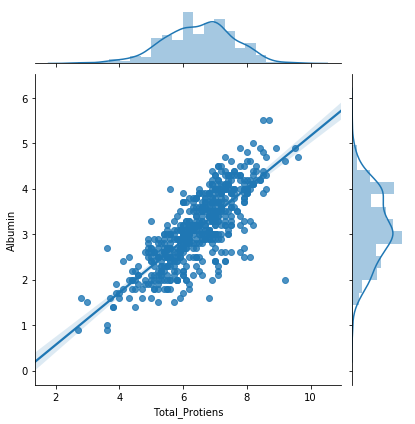

In [20]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

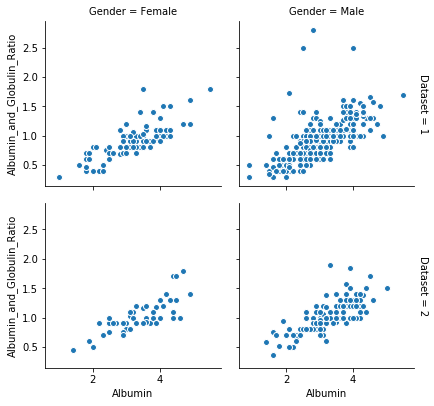

In [21]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

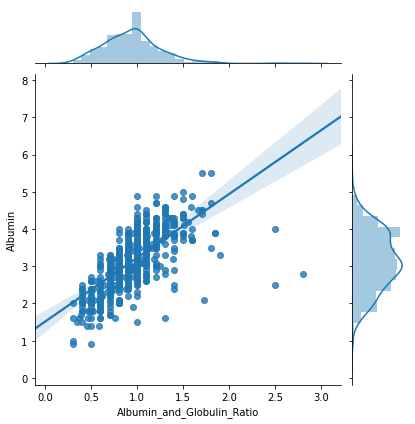

In [22]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

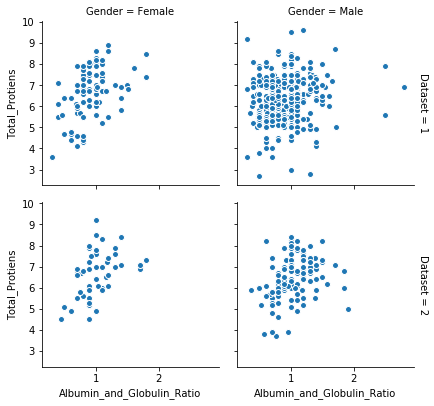

In [23]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [25]:
#sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")